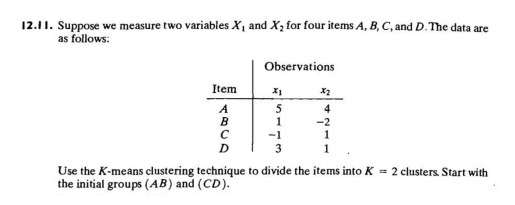

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('D:\MultivariateMethods\Homeworks\Pregunta12_11_11.jpg')

plt.imshow(img)
plt.axis('off') 
plt.show()

# Ejercicio 12.11: Agrupamiento K-means

En este ejercicio utilizaremos la técnica de K-means para agrupar cuatro ítems (A, B, C, D) en dos clústeres (\(K = 2\)) con base en las observaciones de dos variables \(X_1\) y \(X_2\). Comenzamos con los siguientes grupos iniciales:

- **Grupo 1:** (A, B)
- **Grupo 2:** (C, D)

## Pasos a seguir:

1. **Calcular centroides iniciales:** Se calcula el centroide de cada grupo inicial.
2. **Asignar ítems a los grupos:** Cada ítem se asigna al grupo cuyo centroide esté más cercano.
3. **Recalcular centroides:** Se actualizan los centroides con base en las nuevas asignaciones.
4. **Iterar:** Se repiten los pasos 2 y 3 hasta que las asignaciones no cambien.

## Datos iniciales:

| Ítem | \(X_1\) | \(X_2\) |
|------|-------|-------|
| A    | 5     | 4     |
| B    | 1     | -2    |
| C    | -1    | 1     |
| D    | 3     | 1     |

El objetivo es encontrar la mejor agrupación de estos ítems utilizando K-means.

Datos iniciales:
  Item  X1  X2
0    A   5   4
1    B   1  -2
2    C  -1   1
3    D   3   1

Resultados finales:
  Item  X1  X2  Cluster
0    A   5   4        1
1    B   1  -2        2
2    C  -1   1        2
3    D   3   1        1


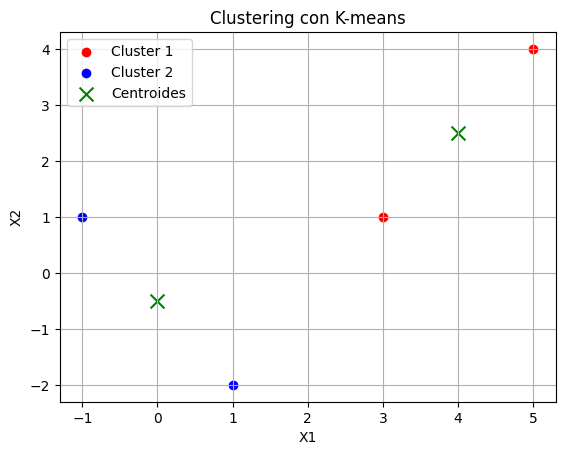

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos iniciales
items = ['A', 'B', 'C', 'D']
x1 = [5, 1, -1, 3]
x2 = [4, -2, 1, 1]

# Crear DataFrame
data = pd.DataFrame({'Item': items, 'X1': x1, 'X2': x2})
print("Datos iniciales:")
print(data)

# Grupos iniciales
initial_clusters = {'Cluster 1': ['A', 'B'], 'Cluster 2': ['C', 'D']}

# Función para calcular el centroide de un cluster
def calculate_centroid(cluster_data):
    return cluster_data.mean(axis=0)

# Calcular los centroides iniciales
centroid_1 = calculate_centroid(data[data['Item'].isin(initial_clusters['Cluster 1'])][['X1', 'X2']])
centroid_2 = calculate_centroid(data[data['Item'].isin(initial_clusters['Cluster 2'])][['X1', 'X2']])

# Función para asignar cada ítem al cluster más cercano
def assign_clusters(data, centroid_1, centroid_2):
    distances = []
    for i in range(len(data)):
        dist_to_centroid_1 = np.linalg.norm(data.iloc[i][['X1', 'X2']] - centroid_1)
        dist_to_centroid_2 = np.linalg.norm(data.iloc[i][['X1', 'X2']] - centroid_2)
        if dist_to_centroid_1 < dist_to_centroid_2:
            distances.append(1) # Cluster 1
        else:
            distances.append(2) # Cluster 2
    return distances

# Iterar hasta que no haya cambios en las asignaciones
max_iterations = 10
for _ in range(max_iterations):
    # Asignar clusters
    data['Cluster'] = assign_clusters(data, centroid_1, centroid_2)
    
    # Calcular nuevos centroides
    new_centroid_1 = calculate_centroid(data[data['Cluster'] == 1][['X1', 'X2']])
    new_centroid_2 = calculate_centroid(data[data['Cluster'] == 2][['X1', 'X2']])
    
    # Verificar si los centroides no cambian
    if new_centroid_1.equals(centroid_1) and new_centroid_2.equals(centroid_2):
        break
    else:
        centroid_1, centroid_2 = new_centroid_1, new_centroid_2

# Mostrar resultados
print("\nResultados finales:")
print(data)

# Graficar los resultados
plt.scatter(data[data['Cluster'] == 1]['X1'], data[data['Cluster'] == 1]['X2'], color='red', label='Cluster 1')
plt.scatter(data[data['Cluster'] == 2]['X1'], data[data['Cluster'] == 2]['X2'], color='blue', label='Cluster 2')
plt.scatter([centroid_1['X1'], centroid_2['X1']], [centroid_1['X2'], centroid_2['X2']], color='green', marker='x', s=100, label='Centroides')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Clustering con K-means')
plt.legend()
plt.grid(True)
plt.show()
